#<u>Applying sentiment analysis to song lyrics of different musical genres:</u>
As an example, I'll be looking into comparing the tones of song lyrics from my Coldplay and rap Spotify playlists.

In [ ]:
!pip install lyricsgenius
!pip install textblob
!python -m textblob.download_corpora

In [ ]:
from gensim.summarization import keywords
from textblob import TextBlob 
import lyricsgenius
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
from spacy.lang.en import English
nlp = English()

In [ ]:
# using the Genius API to get song lyrics
genius = lyricsgenius.Genius("insert client access token")

In [ ]:
# create function for preprocessing Spotify playlist file
def processing(file):
  df = pd.read_csv(file + str(".csv"))
  columns = list(df.columns.values)[0].split("\t")
  df_list = df.iloc[:,0].tolist()
  df = []
  for row in df_list:
    df.extend([row.split("\t")])

  songs = [row[0] for row in df]
  artists = [row[1] for row in df]
  albums = [row[2] for row in df]

  data = {columns[0]: songs,
          columns[1]: artists,
          columns[2]: albums}
  return (data, columns[:3])

coldplay_info = processing("coldplay")
coldplay_df = pd.DataFrame(coldplay_info[0], columns = coldplay_info[1])
coldplay_df.head()

,Track Name,Artist Name,Album Name
0,Hymn for the Weekend,Coldplay,A Head Full of Dreams
1,Fix You,Coldplay,X&Y
2,Hurts Like Heaven,Coldplay,Mylo Xyloto
3,A L I E N S,Coldplay,A L I E N S
4,Magic,Coldplay,Ghost Stories


In [ ]:
# writing the functions

def get_lyrics(song, artist):
  try:
    # genius.remove_section_headers = True
    return genius.search_song(song, artist).lyrics
  except:
    return "song not found"

def get_sentiment(lyrics):
  analysis = TextBlob(lyrics)
  return analysis.sentiment.polarity

def preprocess(text):
    # create Doc object and disable unnecessary pipeline components
    doc = nlp(text, disable=['ner', 'parser'])
    # generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # remove stopwords and non-alphabetic characters
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma.lower() not in stopwords]
    
    return ' '.join(a_lemmas)

In [ ]:
lyrics = coldplay_df.apply(lambda row: get_lyrics(row['Track Name'], row['Artist Name']), axis=1)
coldplay_df['Lyrics'] = lyrics

In [ ]:
rap_info = processing("rap")
rap_df = pd.DataFrame(rap_info[0]), columns = rap_info[1])
rap_df.head()

,Track Name,Artist Name,Album Name
0,RAP DEVIL,Machine Gun Kelly,RAP DEVIL
1,Keanu Reeves,Logic,Confessions of a Dangerous Mind
2,HUMBLE.,Kendrick Lamar,DAMN.
3,Lucky You (feat. Joyner Lucas),Eminem,Kamikaze
4,Mockingbird,Eminem,Encore (Deluxe Version)


In [ ]:
lyrics = rap_df.apply(lambda row: get_lyrics(row['Track Name'], row['Artist Name']), axis=1)
rap_df['Lyrics'] = lyrics

Mean: 0.1102276523858327
Min: -0.33482142857142855
Max: 0.4

Mean: 0.07395364004039429
Min: -0.3476641414141414
Max: 0.75


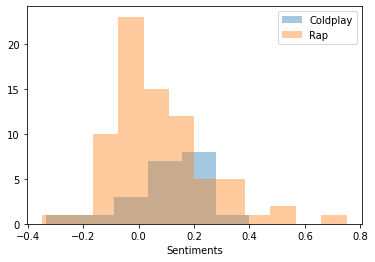

In [ ]:
sentiments = coldplay_df.apply(lambda row: get_sentiment(row['Lyrics']), axis=1)
coldplay_df['Sentiments'] = sentiments
print("Mean: {}".format(coldplay_df['Sentiments'].mean()))
print("Min: {}".format(coldplay_df['Sentiments'].min()))
print("Max: {}\n".format(coldplay_df['Sentiments'].max()))

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(a=coldplay_df['Sentiments'], kde=False, label="Coldplay")

sentiments = rap_df.apply(lambda row: get_sentiment(row['Lyrics']), axis=1)
rap_df['Sentiments'] = sentiments
print("Mean: {}".format(rap_df['Sentiments'].mean()))
print("Min: {}".format(rap_df['Sentiments'].min()))
print("Max: {}".format(rap_df['Sentiments'].max()))

sns.distplot(a=rap_df['Sentiments'], kde=False, label="Rap")
plt.legend()

# sentiment analysis score ranges from -1 to 1 (negative tone to positive tone, respectively)

In [ ]:
# looking into the outlier
rap_df.loc[rap_df["Sentiments"] == 0.75]

,Track Name,Artist Name,Album Name,Lyrics,Sentiments
37,Hall of Fame (feat. will.i.am),The Script,#3 Deluxe Version,"Yeah, you can be the greatest, you can be the ...",0.75


In [ ]:
TextBlob("Yeah, you can be the greatest, you can be the best").sentiment

Sentiment(polarity=1.0, subjectivity=0.65)

In [ ]:
print(genius.search_song("Hall of Fame (feat. will.i.am)", "The Script").lyrics)

Searching for "Hall of Fame (feat. will.i.am)" by The Script...
Done.
Yeah, you can be the greatest, you can be the best
You can be the King Kong bangin' on your chest
You can beat the world, you can beat the war
You can talk to God, go bangin' on his door
You can throw your hands up, you can beat the clock (Yeah)
You can move a mountain, you can break rocks
You can be a master, don’t wait for luck
Dedicate yourself and you gon' find yourself

Standin' in the Hall of Fame (Yeah)
And the world’s gonna know your name (Yeah)
‘Cause you burn with the brightest flame (Yeah)
And the world’s gonna know your name (Yeah)
And you’ll be on the walls of the Hall of Fame

You can go the distance, you can run the mile
You can walk straight through hell with a smile
You can be the hero, you can get the gold
Breakin' all the records they thought never could be broke, yeah
Do it for your people, do it for your pride
How are you ever gonna know if you never even try?
Do it for your country, do it for yo